In [1]:
#Sentiment Analysis

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import numpy as np

In [3]:
# Load IMDb dataset
num_words = 10000  # Keep the top 10,000 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Padding sequences to ensure uniform input size
maxlen = 100  # Max number of words per review
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [5]:
# Build LSTM Model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 172s 442ms/step - accuracy: 0.8960 - loss: 0.2701 - val_accuracy: 0.8395 - val_loss: 0.4044
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 439ms/step - accuracy: 0.9139 - loss: 0.2321 - val_accuracy: 0.8380 - val_loss: 0.4123
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 171s 438ms/step - accuracy: 0.9235 - loss: 0.2108 - val_accuracy: 0.8306 - val_loss: 0.4337
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 204s 443ms/step - accuracy: 0.9310 - loss: 0.1956 - val_accuracy: 0.8307 - val_loss: 0.4637
Epoch 5/5
231/391 ━━━━━━━━━━━━━━━━━━━━ 51s 325ms/step - accuracy: 0.9323 - loss: 0.1839

In [8]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.8355 - loss: 0.3996
Test Accuracy: 0.8363


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [11]:
# Predictions
y_pred = (model.predict(x_test) > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step


In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
# Plot Accuracy and Loss Curves
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

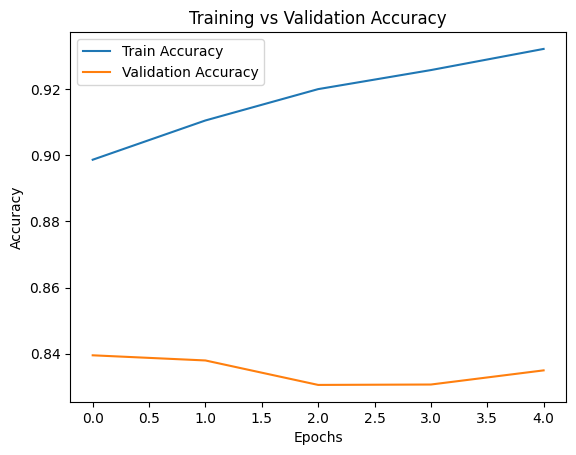

In [19]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

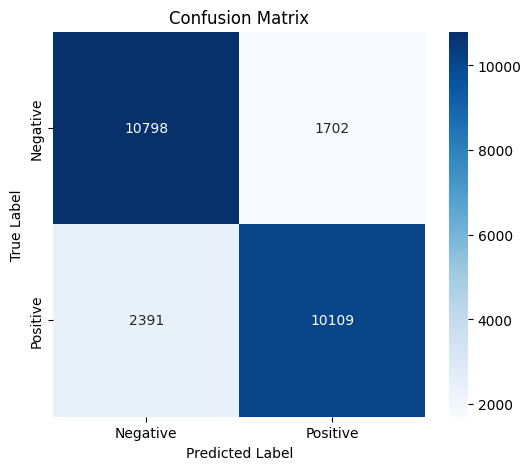

In [20]:
# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [9]:
# Predict a sample review
sample_review = x_test[0].reshape(1, -1)
prediction = model.predict(sample_review)[0][0]
sentiment = "Positive" if prediction > 0.5 else "Negative"
print(f"Predicted Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
Predicted Sentiment: Negative
